In [1]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'inras/code'

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/inras/code


In [2]:
%pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.7 MB/s eta 0:00:00


In [13]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
file_path = 'prueba.ngi'

In [14]:
def read_netcdf_variables(file_path):
    try:
        # Open the NetCDF file
        with Dataset(file_path, 'r') as ds:
            # Access the 'Range' variable
            range_var = ds.variables['Range']
            range_data = range_var[:]
            range_description = range_var.description
            range_units = range_var.units

            # Access the 'Frequency' variable
            frequency_var = ds.variables['Frequency']
            frequency_data = frequency_var[:]
            frequency_description = frequency_var.description
            frequency_units = frequency_var.units

            # Access the 'O-mode_power' variable
            o_mode_power_var = ds.variables['O-mode_power']
            o_mode_power_data = o_mode_power_var[:]
            o_mode_power_description = o_mode_power_var.description
            o_mode_power_units = o_mode_power_var.units

            # Print the data and attributes
            print('data size: range = ', len(range_data), ' frequency = ',len(frequency_data), ' intensity matrix = ',o_mode_power_data.shape)
            print('NOTE: we limit ourselves to print just the first elements\n')
            print("Range Variable:")
            print(f"  Description: {range_description}")
            print(f"  Units: {range_units}")
            print(f"  Data: {range_data[:10]}")

            print("\nFrequency Variable:")
            print(f"  Description: {frequency_description}")
            print(f"  Units: {frequency_units}")
            print(f"  Data: {frequency_data[:10]}")

            print("\nO-mode_power Variable:")
            print(f"  Description: {o_mode_power_description}")
            print(f"  Units: {o_mode_power_units}")
            print(f"  Data: {o_mode_power_data[:5][:5]}")

            return range_data, frequency_data, o_mode_power_data

    except Exception as e:
        print(f"Error reading NetCDF file: {e}")
        return None, None

In [15]:
range_data, frequency_data, o_mode_power_data = read_netcdf_variables(file_path)

data size: range =  512  frequency =  452  intensity matrix =  (452, 512)
NOTE: we limit ourselves to print just the first elements

Range Variable:
  Description: Radar Range
  Units: kilometer
  Data: [ 1.4989623  2.9979246  4.4968867  5.995849   7.4948115  8.993773
 10.492736  11.991698  13.490661  14.989623 ]

Frequency Variable:
  Description: Nominal Frequency
  Units: kilohertz
  Data: [1601.    1609.    1617.039 1625.12  1633.24  1641.402 1649.604 1657.847
 1666.131 1674.456]

O-mode_power Variable:
  Description: Ordinary mode received power
  Units: decibel
  Data: [[92.35711  91.923134 91.87751  ... 65.069016 64.882195 64.70439 ]
 [93.11822  92.89905  92.7657   ... 47.370483 47.869568 48.16845 ]
 [94.60022  94.291046 94.13848  ... 29.005548 31.546143 30.729158]
 [95.60256  95.35594  95.26287  ... 28.847069 27.849068 27.279222]
 [96.26548  96.17726  96.11337  ... 23.597763 22.80251  24.098804]]


In [16]:
def plot_o_mode_power(f,h,c):
    '''
    f = frequency axis - X axis
    h = height axis - Y axis
    c = intensity matrix
    '''
    c = c.T
    plt.figure(figsize=(8, 5))
    plt.pcolormesh(f, h, c, cmap='viridis')

    plt.xlabel('Frequency (KHz)')
    plt.ylabel('Range (Km)')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

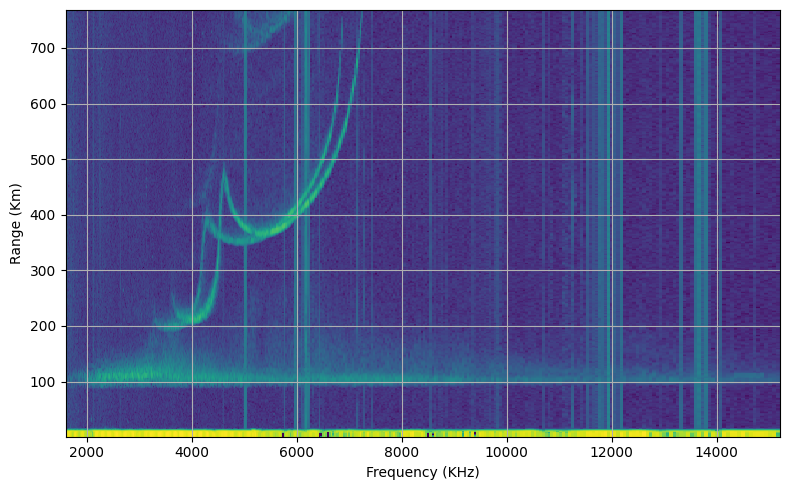

In [17]:
plot_o_mode_power(frequency_data,range_data,o_mode_power_data)